<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>

- 출처 1 : (교재) 머신러닝 교과서 with 파이썬, 사이킷런, 텐서플로 
- 출처 2 : (교재) 비즈니스 애널리틱스를 위한 데이터 마이닝 R
- 출처 3 : (URL) <span> https://hyemin-kim.github.io/2020/08/04/S-Python-sklearn4/#4-%EC%95%99%EC%83%81%EB%B8%94-ensemble-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98 </span>

# 앙상블(Ensemble) 학습이란

여러 분류기를 하나의 분류기로 연결하여 개별 분류기보다 더 좋은 성능을 만드는 것을 목표로 하는 학습

결국 더 훌륭한 모델을 만들기 위한 방법

앙상블의 방법을 여러가지 존재, 아래에서 계속 소개


In [3]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 분할에 필요
from sklearn.model_selection import train_test_split

# 최적화 모델링에 필요한 라이브러리
from sklearn.model_selection import GridSearchCV

# 평가를 위한 라이브러리 설치
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_curve, auc # 정확도, 민감도 등
from sklearn.model_selection import cross_val_score # Roc 관련

In [4]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


## 투표(Voting)

- 투표를 통해 최종 결과를 결정하는 방식
- 동일한 훈련 세트
- 여러가지 알고리즘을 사용
- 샘플을 뽑을 때 중복은 없음
- 싱글 모델은 튜플 형태로 정의
- 우선적으로 여러 모델을 쓰기 때문 여러 모델을 모델링하는 과정이 필요

### 투표(회귀) 실습

In [5]:
# 모델링을 위한 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# 앙상블을 위한 라이브러리
from sklearn.ensemble import VotingRegressor

#### 데이터 분할

In [6]:
# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#### 각각의 모델 모델링

In [7]:
# LinearRegression #
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, Y_train)

print("모델 < LinearRegression >")
print("Train Set Score1 : {}".format(linear_reg.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(linear_reg.score(X_test, Y_test)))


# Ridge #
ridge = Ridge(alpha=1)
ridge.fit(X_train, Y_train)

print("\n모델 < Ridge >")
print("Train Set Score1 : {}".format(ridge.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(ridge.score(X_test, Y_test)))


# Lasso #
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

print("\n모델 < Lasso >")
print("Train Set Score1 : {}".format(lasso.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(lasso.score(X_test, Y_test)))


# Elasticnet #
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
elasticnet.fit(X_train, Y_train)

print("\n모델 < Elasticnet >")
print("Train Set Score1 : {}".format(elasticnet.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(elasticnet.score(X_test, Y_test)))


# With Standard Scaling #
standard_elasticnet = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

standard_elasticnet.fit(X_train, Y_train).predict(X_test)

print("\n모델 < Standard Scaling >")
print("Train Set Score1 : {}".format(standard_elasticnet.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(standard_elasticnet.score(X_test, Y_test)))


# 2-Degree Polynomial Features + Standard Scaling #
poly_elasticnet = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

poly_elasticnet.fit(X_train, Y_train).predict(X_test)

print("\n모델 < Polynomial Features >")
print("Train Set Score1 : {}".format(standard_elasticnet.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(standard_elasticnet.score(X_test, Y_test)))

모델 < LinearRegression >
Train Set Score1 : 0.42929124660238704
Test  Set Score1 : 0.40190847510371774

모델 < Ridge >
Train Set Score1 : 0.4292723553637303
Test  Set Score1 : 0.4024955531960738

모델 < Lasso >
Train Set Score1 : 0.423262401253343
Test  Set Score1 : 0.4035293868807106

모델 < Elasticnet >
Train Set Score1 : 0.09851107754251942
Test  Set Score1 : 0.10031479193785953

모델 < Standard Scaling >
Train Set Score1 : 0.2419134349482247
Test  Set Score1 : 0.22022021462744912

모델 < Polynomial Features >
Train Set Score1 : 0.2419134349482247
Test  Set Score1 : 0.22022021462744912


#### Voting 모델링

In [8]:
# 설계된 모델 묶기 #
# 보팅에 참여한 single models 지정
single_models = [
    ('linear_reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet', elasticnet),
    ('standard_elasticnet', standard_elasticnet),
    ('poly_elasticnet', poly_elasticnet)
]

In [9]:
# voting regressor 모델링
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

# 학습
voting_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet', ElasticNet(alpha=0.5, l1_ratio=0.2)),
                            ('standard_elasticnet',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.5,
                                                         l1_ratio=0.2))])),
                            ('poly_elasticnet',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.5,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

#### Voting 모델 평가

In [10]:
# 테스트 #
print("모델 < Ensemble_Voting >")
print("Train Set Score1 : {}".format(voting_regressor.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(voting_regressor.score(X_test, Y_test)))

## 단일의 모델보다는 결과가 좋긴함
## 하지만 몇몇의 단일 모델이 성능이 더 좋아보임 

모델 < Ensemble_Voting >
Train Set Score1 : 0.3737678368346409
Test  Set Score1 : 0.3610036163445476


### 투표(분류) 실습

- 투표에 분률 할 때는 투표 방식을 soft로 할것인지, hard로 할 것 인지도 중요
- voting ='soft', 'hard'
- KNN도 있기 때문에 정규화도 진행

In [11]:
# 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

#### 데이터 전처리 및 분할

In [12]:
# 함수 선언 #
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [13]:
# 정규화
data["Age"] = min_max_normalize(data["Age"])
data["Fare"] = z_score_normalize(data["Fare"])

# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#### 각각의 모델 모델링

In [14]:
# 모델링 및 적합 #

# LogisticRegression
lr_model = LogisticRegression(random_state = 5)
lr_model.fit(X_train, Y_train)

print("모델 < LogisticRegression >")
print("Train Set Score1 : {}".format(lr_model.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(lr_model.score(X_test, Y_test)))


# DecisionTreeClassifier
dTree = DecisionTreeClassifier(random_state = 5, max_depth = 3, min_samples_split = 8)
dTree.fit(X_train, Y_train)

print("\n모델 < DecisionTreeClassifier >")
print("Train Set Score1 : {}".format(dTree.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(dTree.score(X_test, Y_test)))


# KNeighborsClassifier
## 정규화를 어떻게 적용시키는게 좋을지 고민이 들어
## 잘못 건들기보다는 정규화를 안하는 방법을 선택
knn_model = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
knn_model.fit(X_train, Y_train)

print("\n모델 < KNeighborsClassifier >")
print("Train Set Score1 : {}".format(knn_model.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(knn_model.score(X_test, Y_test)))

모델 < LogisticRegression >
Train Set Score1 : 0.8105939004815409
Test  Set Score1 : 0.835820895522388

모델 < DecisionTreeClassifier >
Train Set Score1 : 0.826645264847512
Test  Set Score1 : 0.7985074626865671

모델 < KNeighborsClassifier >
Train Set Score1 : 0.8475120385232745
Test  Set Score1 : 0.7873134328358209


#### Voting 모델링

In [15]:
models = [
    ('Logit', lr_model),
    ('DecisionTree', dTree),
    ('KNN', knn_model) 
]

# 모델링
vc = VotingClassifier(models, voting='soft')

# 적합 = 학습
vc.fit(X_train, Y_train)

VotingClassifier(estimators=[('Logit', LogisticRegression(random_state=5)),
                             ('DecisionTree',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_split=8,
                                                     random_state=5)),
                             ('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=10))],
                 voting='soft')

#### Voting 모델 평가

In [16]:
# 테스트 데이터로 예측 #
y_pred = vc.predict(X_test)

In [17]:
# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,150,22
Real_False,29,67


In [18]:
# 테스트 #
print("모델 < VotingClassifier >")
print("Train Set Score1 : {}".format(vc.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(vc.score(X_test, Y_test)))

## 몇몇개의 모델보다는 안정적인 모델이 됨

모델 < VotingClassifier >
Train Set Score1 : 0.8362760834670947
Test  Set Score1 : 0.8097014925373134


In [19]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report")
print(classification_report(Y_test, y_pred))

Classification_Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       172
           1       0.75      0.70      0.72        96

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



In [20]:
# 직접 확인 
print("< Voting Classifier >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< Voting Classifier >
잘못 분류된 샘플 수 : 51
정확도(Accuracy) : 0.8097014925373134
정밀도(Precision) : 0.7528089887640449
재현율(Recall) : 0.6979166666666666
F1_Score : 0.7243243243243243


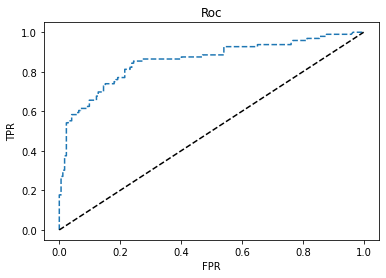

In [21]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, vc.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

## 배깅 (Bagging)

- 배깅은 Bootstrap Aggregating의 줄임말
- Bootstrap이란 여러 개의 dataset을 중복을 허용(복원 추출)하여 샘플링하여 분할하는 방식
- Voting은 여러 알고리즘의 조합에 대한 앙상블
- Bagging은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블
- 대표적인 방법 : Random Forest, Bagging


### 배깅 실습

 - base_estimator 
  > - 사용할 모델
 - n_estimators
  > - 500개 동시 학습 # 모형의 갯수(시행할 횟수), 디폴트 10,
 - max_samples 
  > - 들어가는 샘플의 한계 (들어가는 샘플 수는 랜덤임)
 - max_features 
  > - 하나의 예측기가 가져갈 수 있는 최대의 칼럼 갯수
 - bootstrap = True
  > - 복원 추출 여부
 - bootstrap_features = False
  > - 칼럼 중복 사용 여부
 - n_jobs = 1
  > - 사용할 CPU 코어 수 지정 (None(=1)이 기본값, -1로 설정하면 모든 프로세서를 다 사용


#### 라이브러리 및 데이터 불러오기

In [22]:
# 라이브러리 불러오기
from sklearn.ensemble import BaggingClassifier

In [23]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


#### 모델링

In [24]:
# 사용할 base model 선택 및 모델링 # 
#  DecisionTree 모델 사용 
dtree_model = DecisionTreeClassifier(random_state = 5)

# 만든 모델을 기반으로 Bagging Model 설계
bag_model = BaggingClassifier(
  base_estimator = dtree_model, # 사용할 모델
  n_estimators = 500, # 500개 동시 학습 # 모형의 갯수(시행할 횟수), 디폴트 10,
  max_samples = 1.0,  # 들어가는 샘플의 한계 (들어가는 샘플 수는 랜덤임)
  max_features = 1.0, # 하나의 예측기가 가져갈 수 있는 최대의 칼럼 갯수
  bootstrap = True,  # 복원 추출 여부
  bootstrap_features = False, # 칼럼 중복 사용 여부
  n_jobs = -1, # 사용할 CPU 코어 수 지정 (None(=1)이 기본값, -1로 설정하면 모든 프로세서를 다 사용
  random_state = 5  
)

# 모델 학습
bag_model.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=5),
                  n_estimators=500, n_jobs=-1, random_state=5)

#### 모델 평가

In [25]:
# 테스트 데이터로 예측 #
y_pred = bag_model.predict(X_test)

# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,147,25
Real_False,30,66


In [26]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report")
print(classification_report(Y_test, y_pred))

Classification_Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       172
           1       0.73      0.69      0.71        96

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [27]:
# 직접 확인 
print("< Decision Tree + Bagging >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< Decision Tree + Bagging >
잘못 분류된 샘플 수 : 55
정확도(Accuracy) : 0.7947761194029851
정밀도(Precision) : 0.7252747252747253
재현율(Recall) : 0.6875
F1_Score : 0.7058823529411764


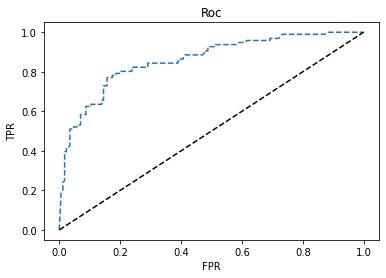

In [28]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, bag_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [30]:
# Auc로 평가 #
clf_labels = ["Decision Tree", "Bagging"]

all_clf = [dtree_model, bag_model]

for clf, label in zip(all_clf, clf_labels) :
  scores = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")
  print("[{}] Roc_Auc : {} (+/- {})".format(label, scores.mean(), scores.std()))

[Decision Tree] Roc_Auc : 0.7576100393841747 (+/- 0.034972555809962134)
[Bagging] Roc_Auc : 0.848679126387397 (+/- 0.03869754846611576)


### 랜덤포레스트(Random Forest) 실습

- Decision Tree 기반 Bagging 앙상블
- 굉장히 인기있는 앙상블 모델
- 사용성이 쉽고, 성능도 우수
- 단일 분류 알고리즘(DT) 사용
- 무작위로 예측변수 선택하여 모델 구축
- 결과 결합 : 투표(분류), 평균화(예측)
- 나무구조로 표현(X) => 변수의 중요도 제공
- 주요 파라미터
 > - random_state : random seed 고정 값
 > - n_jobs : CPU 사용 갯수
 > - max_depth : 깊어질 수 있는 최대 깊이. 과대적합 방지용
 > - n_estimators : 암상블하는 트리의 갯수
 > - max_features : best split을 판단할 때 최대로 사용할 feature의 갯수 {‘auto’, ‘sqrt’, ‘log2’}. 과대적합 방지용
 > - min_samples_split : 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용


In [33]:
# 랜덤 포레스트 라이브러리 #
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=5)
rfr.fit(X_train, Y_train)

RandomForestRegressor(random_state=5)

In [34]:
# 테스트 #
print("모델 < RandomForestRegressor >")
print("Train Set Score1 : {}".format(rfr.score(X_train, Y_train)))
print("Test  Set Score1 : {}".format(rfr.score(X_test, Y_test)))

모델 < RandomForestRegressor >
Train Set Score1 : 0.9019348459896986
Test  Set Score1 : 0.40508043615422573


## 부스팅

- 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식
- 성능이 매우 우수
- 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감
- 학습 시간이 오래걸림
- 대표적인 기법 : AdaBoost, GradientBoost, LightGBM, XGBoost

### AdaBoost